# Getting familiar with the data 

In this notebook, we are going to do some basic exploration of the dataset. We shall observe some samples from each dataset and number of image samples in them. As images are obtained from multiple sources, the quality of the segmentation and the dimension of the images varies a lot. We are going use data analysis toolkit [pandas](https://pandas.pydata.org/pandas-docs/stable/) to perform our exploration. If you are not familiar with this library check out their [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) short introduction.

In [59]:
# Importing necessary libraries
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# Declare constants which will be used while plotting the data
FS_AXIS_LABEL=14
FS_TITLE=17
FS_TICKS=12
FIG_WIDTH=16

While writing the codes, files and folder was organized in the following way     
* Numta
   * code
   * Final_DB 
   
The **code** folder contains this jupyter notebook, and the **Final_DB** folder has the raw image datasets.

In [61]:
project_dir='..'

Let's see what is in the **Final_DB** folder.

In [62]:
os.listdir(os.path.join(project_dir,'Final_DB'))
# Notice that I am using the os.path.join() function to create the filepaths instead of writing them down explicitly with a 
# filepath separator ('\\' for windows '/' for linux). This allows us to run this notebook both in windows and linux 
# environment without manually changing the filepath separator

['stats.xlsx',
 'testing-a',
 'testing-a.csv',
 'testing-b',
 'testing-b.csv',
 'testing-c',
 'testing-c.csv',
 'testing-d',
 'testing-d.csv',
 'testing-e',
 'testing-e.csv',
 'testing-f',
 'testing-f.csv',
 'test_label.rar',
 'training-a',
 'training-a.csv',
 'training-b',
 'training-b.csv',
 'training-c',
 'training-c.csv',
 'training-d',
 'training-d.csv',
 'training-e',
 'training-e.csv']

Our dataset has images from sources **A**, **B**, **C**, **D**, **E** and **F**. Tha datasets are already split into train and test sets. The labels of each image is saved in the corresponding .csv files. Let's see some samples of the images.

## Setup the path variables

All the images have .png extension. We are going get all the filepaths that have .png extensions by using the 
glob.glob() function 

In [63]:
paths_train_a=glob.glob(os.path.join(project_dir,'Final_DB','training-a','*.png'))
paths_train_b=glob.glob(os.path.join(project_dir,'Final_DB','training-b','*.png'))
paths_train_e=glob.glob(os.path.join(project_dir,'Final_DB','training-e','*.png'))
paths_test_a=glob.glob(os.path.join(project_dir,'Final_DB','testing-a','*.png'))
paths_test_b=glob.glob(os.path.join(project_dir,'Final_DB','testing-b','*.png'))
paths_test_e=glob.glob(os.path.join(project_dir,'Final_DB','testing-e','*.png'))
path_label_train_a=os.path.join(project_dir,'Final_DB','training-a.csv')
path_label_train_b=os.path.join(project_dir,'Final_DB','training-b.csv')
path_label_train_e=os.path.join(project_dir,'Final_DB','training-e.csv')
path_label_test_a=os.path.join(project_dir,'Final_DB','testing-a.csv')
path_label_test_b=os.path.join(project_dir,'Final_DB','testing-b.csv')
path_label_test_e=os.path.join(project_dir,'Final_DB','testing-e.csv')

## Some Utility Functions

In [64]:
def get_img(path,mode=cv2.IMREAD_GRAYSCALE):
    # read image (if no read mode is defined, the image is read in grayscale)
    img=cv2.imread(path,mode)
    if img is not None:
        return cv2.imread(path,mode) 
    else:
        raise FileNotFoundError('Image does not exist at {}'.format(path))
def imshow_group(paths,n_per_row=10):
    # plot multiple digits in one figure, by default 10 images are plotted per
    n_sample=len(paths)
    j=np.ceil(n_sample/n_per_row)
    fig=plt.figure(figsize=(20,2*j))
    for i, path in enumerate(paths):
        img=get_img(path)
        plt.subplot(j,n_per_row,i+1)
        plt.imshow(img,cmap='gray')  
        plt.title(img.shape)
        plt.axis('off')
    return fig
def get_key(path):
    # separate the key from the filepath of an image
    return path.split(sep=os.sep)[-1]

## Check a few samples from dataset A

We are going to randomly choose a few image filepaths from training set **A**. Then load them in grayscale and plot them.

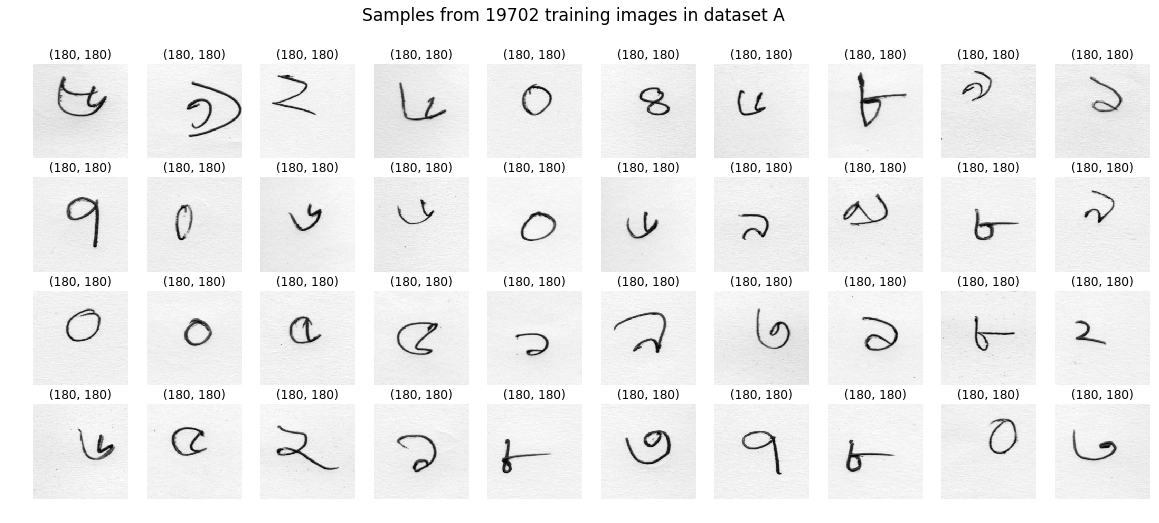

In [65]:
paths=np.random.choice(paths_train_a,size=40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset A'.format(len(paths_train_a)), fontsize=FS_TITLE)
plt.show()

The digits do not fill up the entire image and most of them are not centered. 

## Shape statistics of dataset A

Next, we are going to observe if images in dataset **A** have different shapes. To do this, we are going to put the image shapes in a pandas series object and use its `.value_counts()` attribute to obtain the  counts of its unique values.

### Train A

In [66]:
shapes_train_a_sr=pd.Series([get_img(path).shape for path in paths_train_a])

In [67]:
shapes_train_a_sr.value_counts()

(180, 180)    19702
dtype: int64

All the images have a fixed shape of 180 x 180

### Test A

In [68]:
shapes_test_a_sr=pd.Series([get_img(path).shape for path in paths_test_a])

In [69]:
shapes_test_a_sr.value_counts()

(180, 180)    3489
dtype: int64

## Class distribution statistics of dataset A

Let's observe the frequency of each digit in dataset **A**.

### Train A

Let's read the `.csv` file which contains the labels of dataset **A**. We are using `read_csv()` function from the pandas library which will return the content of the `.csv` file in a dataframe.

In [70]:
df_train_a=pd.read_csv(path_label_train_a)
df_train_a.head() # Observe first five rows 

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


Next, we are going to replace the numerical index of the dataframe with the `filename` column which will give us more convenient access to the dataframe elements.

In [71]:
df_train_a=df_train_a.set_index('filename')
df_train_a.head() # Observe first five rows 

,original filename,scanid,digit,database name original,contributing team,database name
filename,,,,,,
a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


As we can see the labels of each digit is located under the `digit` column. We are going to put the labels of each digit in a series object and use the `.value_counts()` attribute to get the count of each digit.

In [72]:
labels_train_a_sr=pd.Series([df_train_a.loc[get_key(path)]['digit'] for path in paths_train_a])

In [73]:
labels_train_a_sr_vc=labels_train_a_sr.value_counts()

The pandas series object has a `.plot()` attribute which is useful to plot the contents of the series. We are going to use it to make a plot of the frequency of each digit.

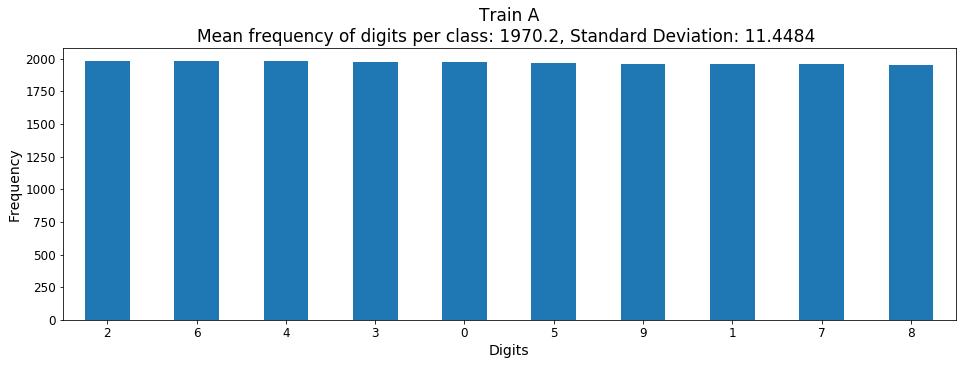

In [74]:
plt.figure(figsize=(FIG_WIDTH,5))
labels_train_a_sr_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Digits', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Train A\nMean frequency of digits per class: {}, Standard Deviation: {:.4f} '.format(labels_train_a_sr_vc.mean(),labels_train_a_sr_vc.std()),
         fontsize=FS_TITLE)
plt.show()

### Test A

Let's see the class distribution statistics in the test set.

In [75]:
df_test_a=pd.read_csv(path_label_test_a)
df_test_a=df_test_a.set_index('filename')
df_test_a.head()

,original filename,scanid,digit,database name original,contributing team,database name
filename,,,,,,
a00000.png,Scan_178_digit_4_num_2.png,178,4,BHDDB,Buet_Broncos,test-a
a00001.png,Scan_206_digit_9_num_1.png,206,9,BHDDB,Buet_Broncos,test-a
a00002.png,Scan_175_digit_3_num_5.png,175,3,BHDDB,Buet_Broncos,test-a
a00003.png,Scan_96_digit_0_num_2.png,96,0,BHDDB,Buet_Broncos,test-a
a00004.png,Scan_131_digit_4_num_4.png,131,4,BHDDB,Buet_Broncos,test-a


In [76]:
labels_test_a_sr=pd.Series([df_test_a.loc[get_key(path)]['digit'] for path in paths_test_a])

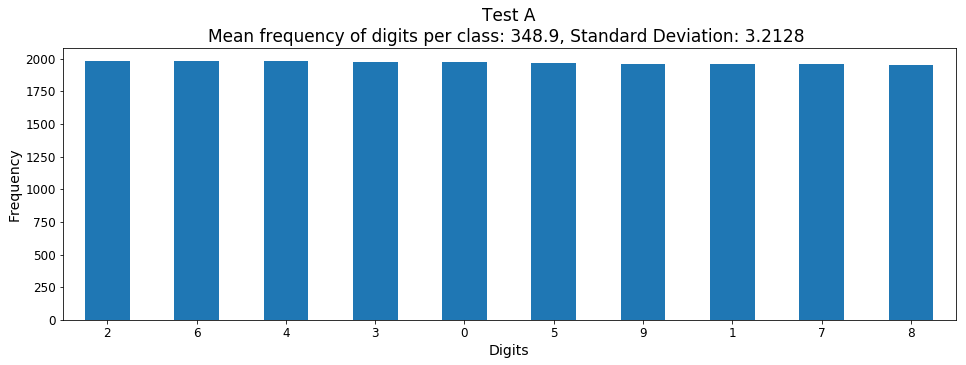

In [77]:
labels_test_a_sr_vc=labels_test_a_sr.value_counts()
plt.figure(figsize=(FIG_WIDTH,5))
labels_train_a_sr_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Digits', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Test A\nMean frequency of digits per class: {}, Standard Deviation: {:.4f} '.format(labels_test_a_sr_vc.mean(),labels_test_a_sr_vc.std()),
         fontsize=FS_TITLE)
plt.show()

The digit classes are well balanced both in the test and train set. We are going to repeat the same steps for dataset **B** and **E**.

## Check a few samples from dataset B

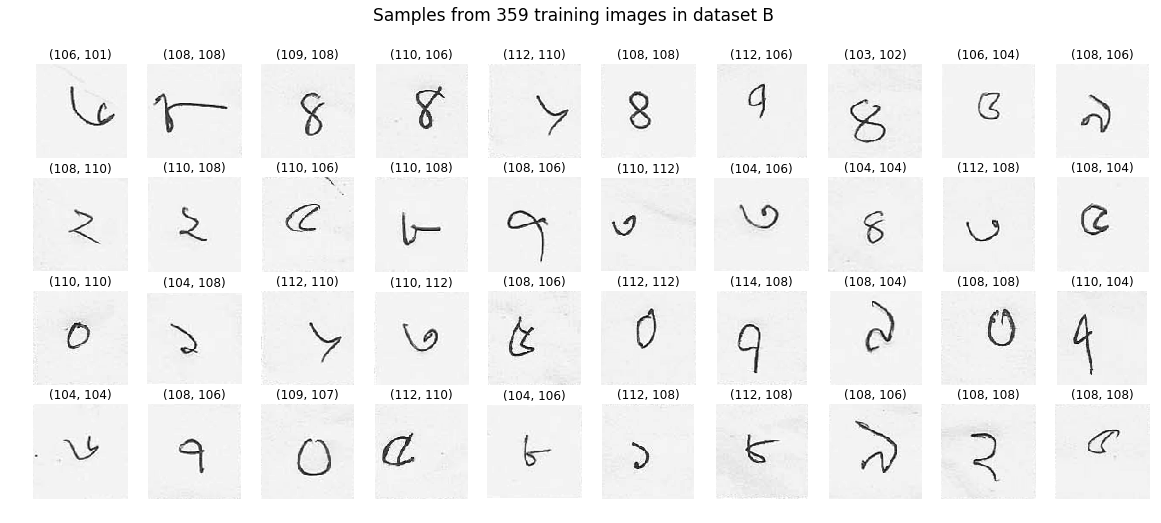

In [78]:
paths=np.random.choice(paths_train_b,size=40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset B'.format(len(paths_train_b)), fontsize=FS_TITLE)
plt.show()

Similar to dataset **A**, most of the digits in **B** do not fill the entire image. Also most of them are not centered.

## Shape statistics of dataset B

### Train B

In [79]:
shapes_train_b_sr=pd.Series([get_img(path).shape for path in paths_train_b])

In [80]:
shapes_train_b_sr_vc=shapes_train_b_sr.value_counts()

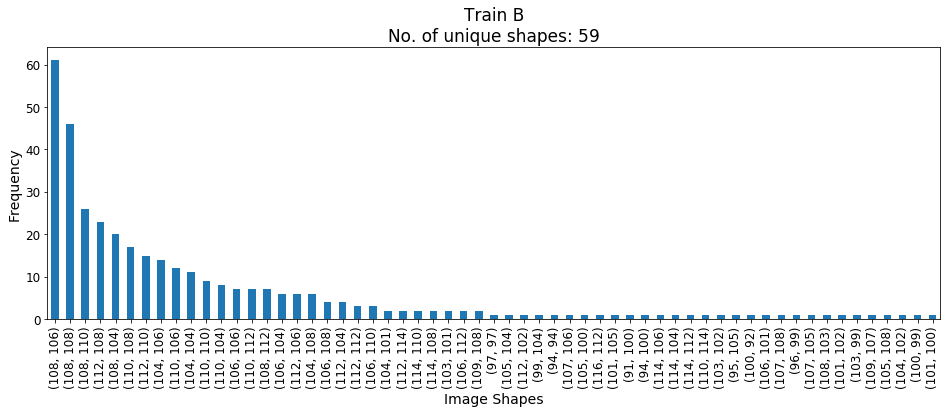

In [81]:
plt.figure(figsize=(FIG_WIDTH,5))
shapes_train_b_sr_vc.plot(kind='bar')
plt.xlabel('Image Shapes', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.xticks(fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.title('Train B\nNo. of unique shapes: {}'.format(shapes_train_b_sr_vc.count()),fontsize=FS_TITLE)
plt.show()

### Test B

In [82]:
shapes_test_b_sr=pd.Series([get_img(path).shape for path in paths_test_b])

In [83]:
shapes_test_b_sr_vc=shapes_test_b_sr.value_counts()

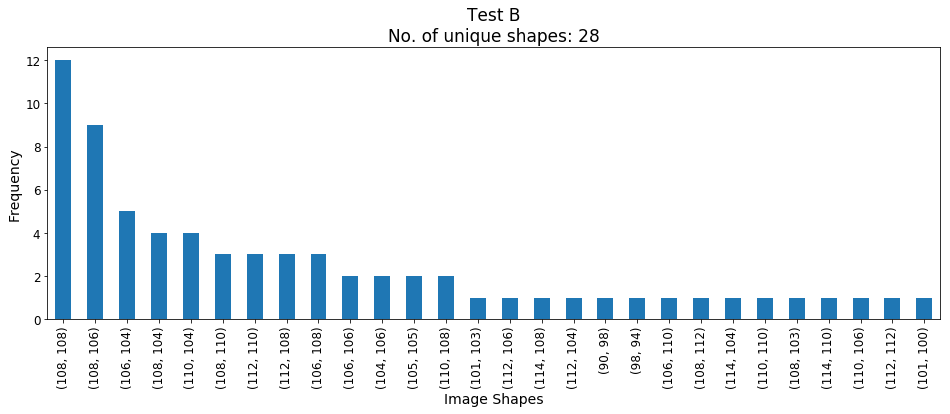

In [84]:
plt.figure(figsize=(FIG_WIDTH,5))
shapes_test_b_sr_vc.plot(kind='bar')
plt.xlabel('Image Shapes', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.xticks(fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.title('Test B\nNo. of unique shapes: {}'.format(shapes_test_b_sr_vc.count()),fontsize=FS_TITLE)
plt.show()

The image shapes in dataset B varies a lot.

## Class distribution statistics of dataset B

### Train B

In [85]:
df_train_b=pd.read_csv(path_label_train_b)
df_train_b=df_train_b.set_index('filename')
df_train_b.head()

,original filename,scanid,digit,database name original,contributing team,database name
filename,,,,,,
b00000.png,0_0005.png,5,0,B101DB,Shongborton,training-b
b00001.png,2_0038.png,38,2,B101DB,Shongborton,training-b
b00002.png,5_0037.png,37,5,B101DB,Shongborton,training-b
b00003.png,2_0039.png,39,2,B101DB,Shongborton,training-b
b00004.png,5_0028.png,28,5,B101DB,Shongborton,training-b


In [86]:
labels_train_b_sr=pd.Series([df_train_b.loc[get_key(path)]['digit'] for path in paths_train_b])

In [87]:
labels_train_b_sr_vc=labels_train_b_sr.value_counts()

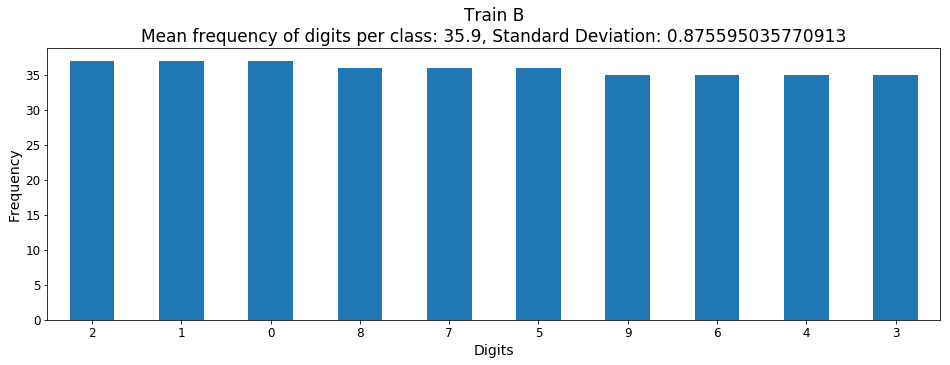

In [88]:
plt.figure(figsize=(FIG_WIDTH,5))
labels_train_b_sr_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Digits', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Train B\nMean frequency of digits per class: {}, Standard Deviation: {}'.format(labels_train_b_sr_vc.mean(),labels_train_b_sr_vc.std()),
         fontsize=FS_TITLE)
plt.show()

### Test B

In [89]:
df_test_b=pd.read_csv(path_label_test_b)
df_test_b=df_test_b.set_index('filename')
df_test_b.head()

,original filename,scanid,digit,database name original,contributing team,database name
filename,,,,,,
b00000.png,0_0036.png,36,0,B101DB,Shongborton,testing-b
b00001.png,7_0024.png,24,7,B101DB,Shongborton,testing-b
b00002.png,9_0016.png,16,9,B101DB,Shongborton,testing-b
b00003.png,2_0024.png,24,2,B101DB,Shongborton,testing-b
b00004.png,4_0027.png,27,4,B101DB,Shongborton,testing-b


In [90]:
labels_test_b_sr=pd.Series([df_test_b.loc[get_key(path)]['digit'] for path in paths_test_b])

In [91]:
labels_test_b_sr_vc=labels_test_b_sr.value_counts()

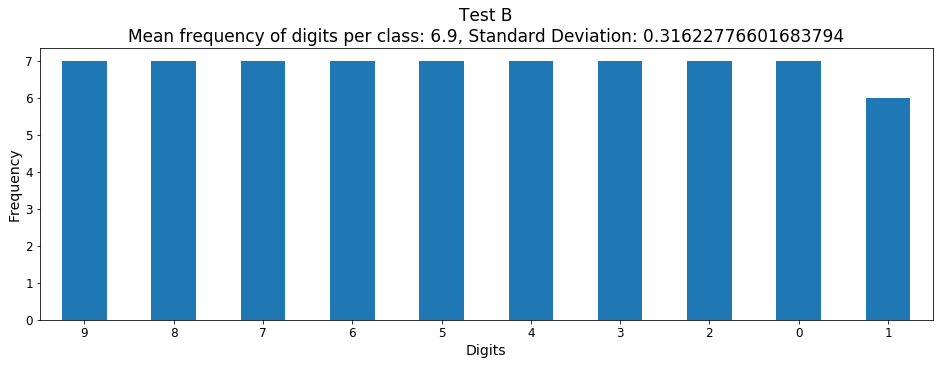

In [92]:
plt.figure(figsize=(FIG_WIDTH,5))
labels_test_b_sr_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Digits', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Test B\nMean frequency of digits per class: {}, Standard Deviation: {}'.format(labels_test_b_sr_vc.mean(),labels_test_b_sr_vc.std()),
         fontsize=FS_TITLE)
plt.show()

## Checking samples from dataset E

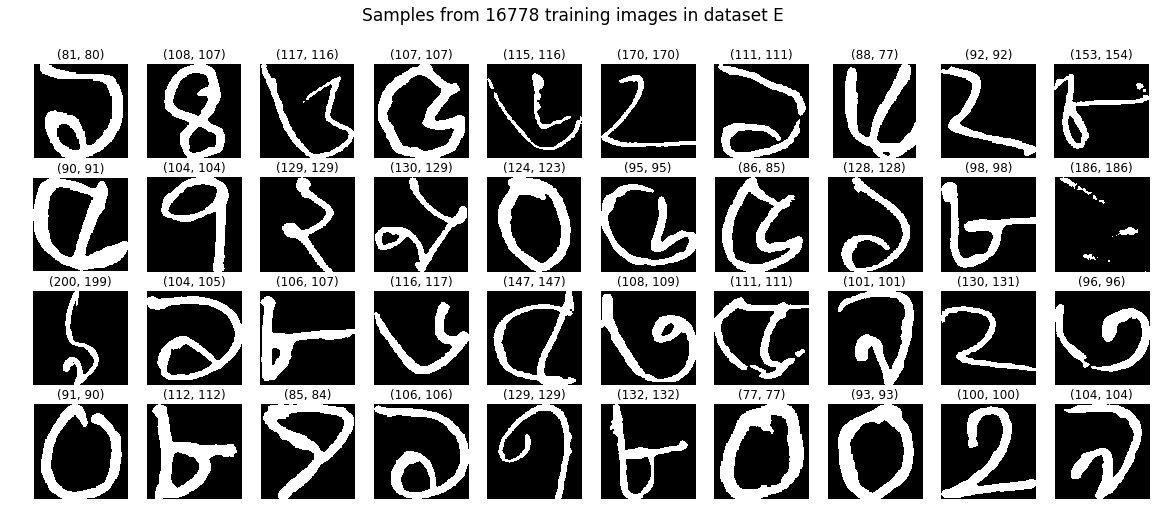

In [93]:
paths=np.random.choice(paths_train_e,40)
fig=imshow_group(paths)
fig.suptitle('Samples from {} training images in dataset E'.format(len(paths_train_e)), fontsize=FS_TITLE)
plt.show()

The images are cropped well and they have minimum non digit area.  

## Shape statistics of dataset E

### Train E

In [94]:
shapes_train_e_sr=pd.Series([get_img(path).shape for path in paths_train_e])

In [95]:
shapes_train_e_sr.nunique()

1523

There are 1515 unique shapes in training dataset **E**.

In [96]:
shapes_train_e_sr_vc=shapes_train_e_sr.value_counts()

Plotting 50 most frequently occuring shapes.

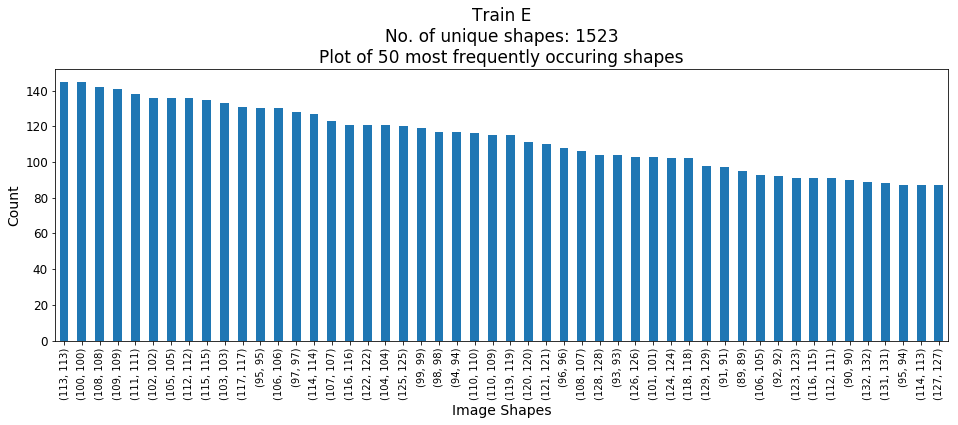

In [97]:
plt.figure(figsize=(FIG_WIDTH,5))
shapes_train_e_sr_vc.iloc[:50].plot(kind='bar')
plt.xticks(fontsize=10)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Image Shapes', fontsize=FS_AXIS_LABEL)
plt.ylabel('Count', fontsize=FS_AXIS_LABEL)
plt.title('Train E\nNo. of unique shapes: {}\nPlot of 50 most frequently occuring shapes'.format(shapes_train_e_sr_vc.count()),fontsize=FS_TITLE)
plt.show()

### Test E

In [98]:
shapes_test_e_sr=pd.Series([get_img(path).shape for path in paths_test_e])

In [99]:
shapes_test_e_sr.nunique()

562

There are 555 unique shapes in test dataset **E**.

In [100]:
shapes_test_e_sr_vc=shapes_test_e_sr.value_counts()

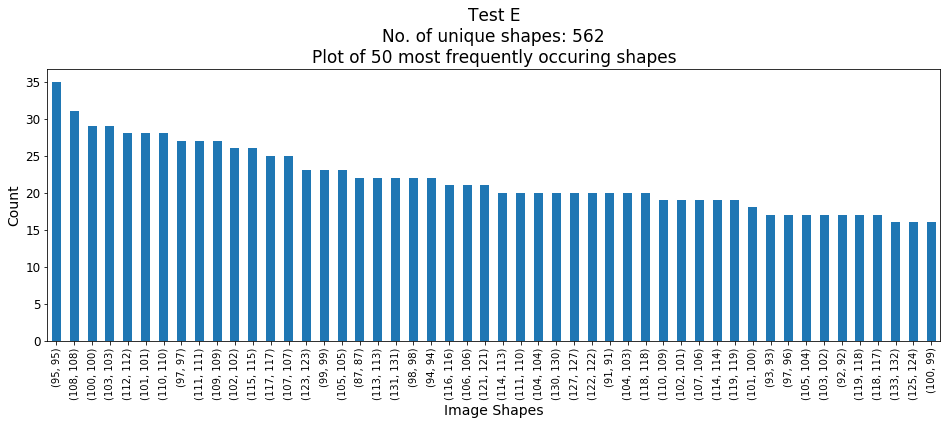

In [101]:
plt.figure(figsize=(FIG_WIDTH,5))
shapes_test_e_sr_vc.iloc[:50].plot(kind='bar')
plt.xticks(fontsize=10)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Image Shapes', fontsize=FS_AXIS_LABEL)
plt.ylabel('Count', fontsize=FS_AXIS_LABEL)
plt.title('Test E\nNo. of unique shapes: {}\nPlot of 50 most frequently occuring shapes'.format(shapes_test_e_sr_vc.count()),
          fontsize=FS_TITLE)
plt.show()

## Class distribution statistics of dataset E

### Train E

In [102]:
df_train_e=pd.read_csv(path_label_train_e)
df_train_e=df_train_e.set_index('filename')
df_train_e.head()

,original filename,districtid,institutionid,gender,age,datestamp,scanid,digit,database name original,database name
filename,,,,,,,,,,
e00000.png,02_0002_1_20_1016_1248_60.png,2,2,1,20,1016,1248,9,BanglaLekha-Isolated,training-e
e00001.png,02_0002_0_19_1016_1183_60.png,2,2,0,19,1016,1183,9,BanglaLekha-Isolated,training-e
e00002.png,01_0001_0_16_0916_0464_51.png,1,1,0,16,916,464,0,BanglaLekha-Isolated,training-e
e00003.png,02_0002_0_24_1016_1464_55.png,2,2,0,24,1016,1464,4,BanglaLekha-Isolated,training-e
e00004.png,02_0002_0_18_1016_1718_56.png,2,2,0,18,1016,1718,5,BanglaLekha-Isolated,training-e


In [103]:
labels_train_e_sr=pd.Series([df_train_e.loc[get_key(path)]['digit'] for path in paths_train_e])

In [104]:
labels_train_e_sr_vc=labels_train_e_sr.value_counts()

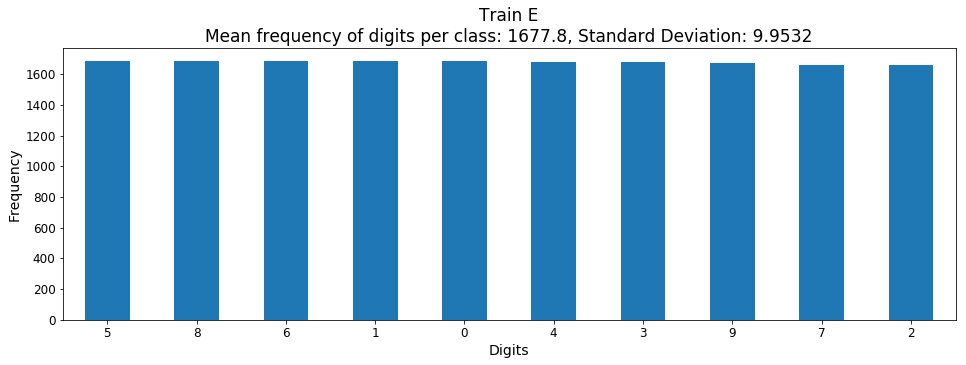

In [105]:
plt.figure(figsize=(FIG_WIDTH,5))
labels_train_e_sr_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Digits', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Train E\nMean frequency of digits per class: {}, Standard Deviation: {:.4f}'.format(labels_train_e_sr_vc.mean(),labels_train_e_sr_vc.std()),
         fontsize=FS_TITLE)
plt.show()

### Test E

In [106]:
df_test_e=pd.read_csv(path_label_test_e)
df_test_e=df_test_e.set_index('filename')
df_test_e.head()

,original filename,districtid,institutionid,gender,age,datestamp,scanid,digit,database name original,database name
filename,,,,,,,,,,
e00000.png,02_0002_0_24_1016_1358_54.png,2,2,0,24,1016,1358,3,BanglaLekha-Isolated,testing-e
e00001.png,02_0002_0_20_1016_0926_52.png,2,2,0,20,1016,926,1,BanglaLekha-Isolated,testing-e
e00002.png,01_0001_1_16_0916_0049_54.png,1,1,1,16,916,49,3,BanglaLekha-Isolated,testing-e
e00003.png,01_0001_1_17_0916_0060_59.png,1,1,1,17,916,60,8,BanglaLekha-Isolated,testing-e
e00004.png,02_0002_0_22_1016_1802_58.png,2,2,0,22,1016,1802,7,BanglaLekha-Isolated,testing-e


In [107]:
labels_test_e_sr=pd.Series([df_test_e.loc[get_key(path)]['digit'] for path in paths_test_e])

In [108]:
labels_test_e_sr_vc=labels_test_e_sr.value_counts()

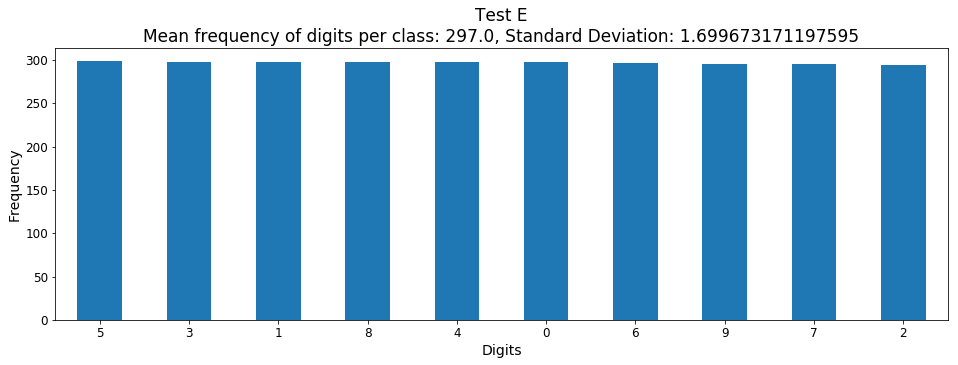

In [109]:
plt.figure(figsize=(FIG_WIDTH,5))
labels_test_e_sr_vc.plot(kind='bar')
plt.xticks(rotation='horizontal',fontsize=FS_TICKS)
plt.yticks(fontsize=FS_TICKS)
plt.xlabel('Digits', fontsize=FS_AXIS_LABEL)
plt.ylabel('Frequency', fontsize=FS_AXIS_LABEL)
plt.title('Test E\nMean frequency of digits per class: {}, Standard Deviation: {}'.format(labels_test_e_sr_vc.mean(),labels_test_e_sr_vc.std()),
         fontsize=FS_TITLE)
plt.show()

# Summary

The classes in each dataset are well balanced. The images in dataset **A** and **B** should be further processed to extract a more focused crop of the digit. Although the shapes of dataset **B** and **E** varies a lot, they have a square or nearly square aspect ratio. Therefore, if resizing to a fixed to shape is necessary (e.g., feeding the images into a fixed input neural network), it should not create much distortion in the digit shape. Below is a summary statistic of the datasets.

In [110]:
df_summary=pd.DataFrame(data={
    'Train Samples':[labels_train_a_sr_vc.sum(),labels_train_b_sr_vc.sum(),labels_train_e_sr_vc.sum()],
    'Test Samples':[labels_test_a_sr_vc.sum(),labels_test_b_sr_vc.sum(),labels_test_e_sr_vc.sum()],
    'Total':[labels_train_a_sr_vc.sum()+labels_test_a_sr_vc.sum(),
             labels_train_b_sr_vc.sum()+labels_test_b_sr_vc.sum(),
             labels_train_e_sr_vc.sum()+labels_test_e_sr_vc.sum()]},
                        index=['A','B','E'],
                        columns=['Train Samples',
                                 'Test Samples',
                                 'Total']                    
            )
df_summary

,Train Samples,Test Samples,Total
A,19702,3489,23191
B,359,69,428
E,16778,2970,19748


There are additional information in the .csv file of dataset **E**. We are going to focus on that in the next notebook. 